In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [162]:
path = r"C:\Users\gagan\Desktop\Mission Robosoft\Datasets\sample_sales_data.csv"
df = pd.read_csv(path)

In [163]:
df.iloc[:, :4].head(5)

,Transaction_ID,Customer_ID,Product_Category,Amount
0,1001,101,Electronics,500
1,1002,102,Clothing,100
2,1003,103,Home & Kitchen,300
3,1004,104,Electronics,700
4,1005,105,Sports,250


In [164]:
df.iloc[:, 4:].head(5)

,Payment_Method,Purchase_Date,Customer_Age,Customer_Gender
0,Credit Card,2024-01-01,25,Male
1,Debit Card,2024-01-02,34,Female
2,Cash,2024-01-03,29,Male
3,Credit Card,2024-01-04,42,Female
4,UPI,2024-01-05,31,Male


In [165]:
#What is the total revenue generated from sales
total_sales_revenue = df['Amount'].sum()
total_sales_revenue

7825

In [166]:
#What are the top 3 product categories by total sales
top_3_product_category = df.groupby("Product_Category")['Amount'].sum()
top_3_product_category.sort_values(ascending = False)[:3]


Product_Category
Electronics       4400
Home & Kitchen    1500
Sports            1150
Name: Amount, dtype: int64

In [167]:
#Which payment method is most frequently used
most_used_payment_method = df['Payment_Method'].value_counts()
most_used_payment_method[:1]

Payment_Method
Credit Card    8
Name: count, dtype: int64

In [168]:
#What is the average transaction amount
avg_transaction_amount = df['Amount'].mean()
avg_transaction_amount

391.25

Text(0.5, 1.0, 'Outlier Check')

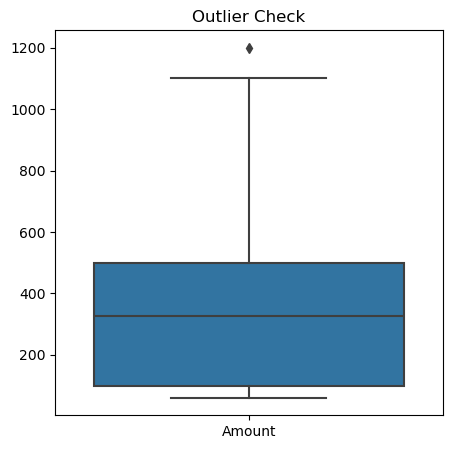

In [169]:
#Are there any outliers in the sales amount
import seaborn as sns
plt.figure(figsize = (5, 5))
sns.boxplot(df['Amount'])
plt.xticks(ticks = [0], labels = ['Amount'])
plt.title("Outlier Check")

In [170]:
for i in range(2):
    q1 = df['Amount'].quantile(0.25)
    q3 = df['Amount'].quantile(0.75)

    iqr = q3 - q1

    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    df = df[(df['Amount'] >= lb) & (df['Amount'] <= ub)] 

Text(0.5, 1.0, 'Outlier Check')

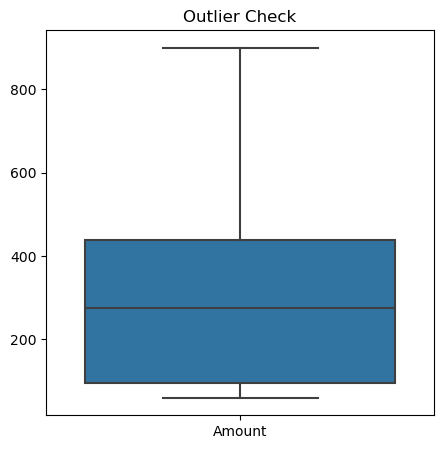

In [171]:
import seaborn as sns
plt.figure(figsize = (5, 5))
sns.boxplot(df['Amount'])
plt.xticks(ticks = [0], labels = ['Amount'])
plt.title("Outlier Check")

<Axes: ylabel='Frequency'>

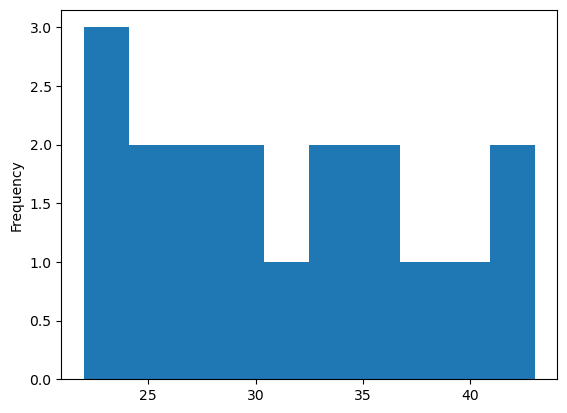

In [172]:
#What is the age distribution of customers
df['Customer_Age'].plot(kind = "hist", bins = 10)

In [173]:
#Do younger customers spend more than older customers
def spending(cols):
    if cols['Customer_Age'] > 24:
        return "Old"
    else:
        return "Young"
df['Spending_by_Customers'] = df.apply(spending, axis = 1)

In [174]:
customer_with_more_spending = df.groupby('Spending_by_Customers')['Amount'].sum()
customer_with_more_spending

Spending_by_Customers
Old      5285
Young     240
Name: Amount, dtype: int64

In [175]:
#Is there a difference in spending behavior based on gender
spending_behavior = df.groupby(['Customer_Gender', 'Product_Category'])['Amount'].sum().reset_index()
spending_behavior[(spending_behavior['Customer_Gender'] == "Female")].sort_values(by=['Customer_Gender', 'Amount'], ascending=[True, False])[:1]

,Customer_Gender,Product_Category,Amount
3,Female,Home & Kitchen,850


In [176]:
spending_behavior[(spending_behavior['Customer_Gender'] == "Male")].sort_values(by=['Customer_Gender', 'Amount'], ascending=[True, False])[:1]

,Customer_Gender,Product_Category,Amount
7,Male,Electronics,1400


In [177]:
#What is the most common age group making purchases
bins = [18, 24, 30, 37, 45, 50] 
labels = ["18-24", "25-30", "30-37", "38-45", "46-50"]
df['Age_Group'] = pd.cut(df['Customer_Age'], bins = bins, labels = labels, right = False)

In [178]:
common_group_purchases = df.groupby('Age_Group')['Amount'].sum()
common_group_purchases.sort_values(ascending = False)[:1]

Age_Group
38-45    2400
Name: Amount, dtype: int64

In [193]:
#On which date did the highest sales occur
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
date_with_highest_sales = df.groupby('Purchase_Date')['Amount'].sum()
date_with_highest_sales.sort_values(ascending=False)[:1]

Purchase_Date
2024-01-19    900
Name: Amount, dtype: int64

<Axes: xlabel='Purchase_Date', ylabel='Amount'>

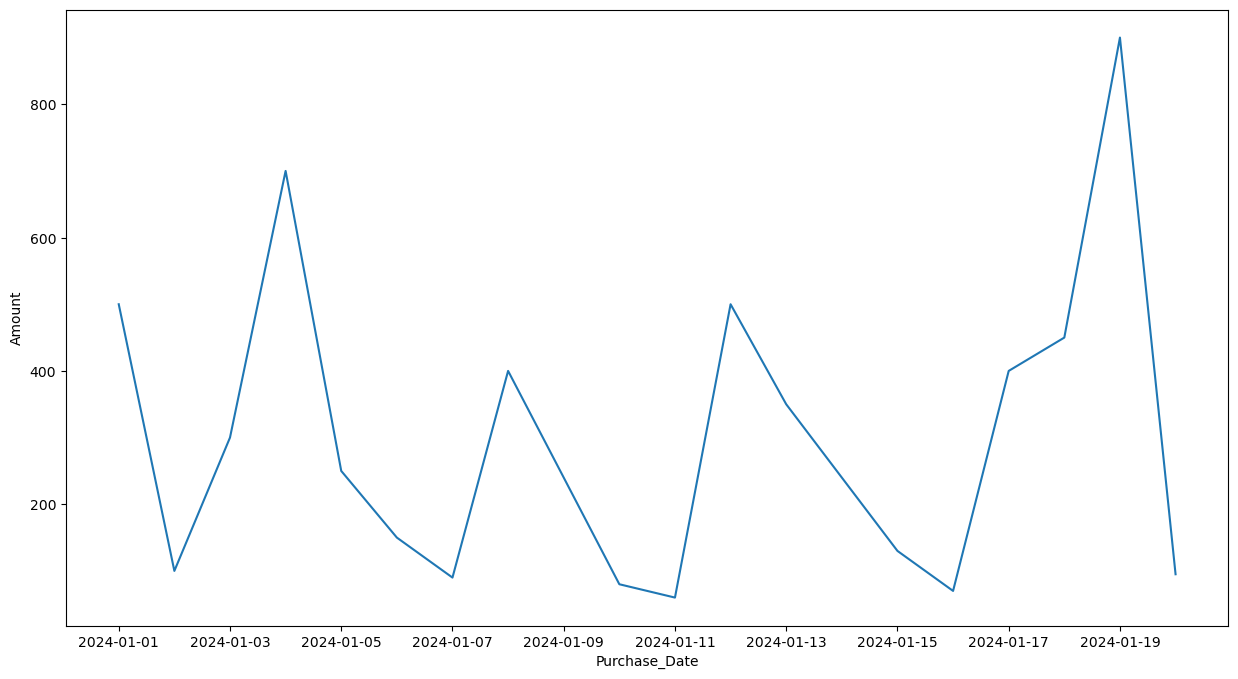

In [ ]:
#Is there a trend in sales over time? (e.g., increasing or decreasing?)
df['Year'] = df['Purchase_Date'].dt.year
plt.figure(figsize=(15, 8))
sns.lineplot(x = df['Purchase_Date'], y  = df['Amount'], markers = df['Amount'])

In [ ]:
#Are there any specific days of the week where sales peak
df['DayOfWeek'] = df['Purchase_Date'].dt.day_name()
sales_by_day = df.groupby("DayOfWeek")["Amount"].sum().reset_index()

In [227]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day["DayOfWeek"] = pd.Categorical(sales_by_day["DayOfWeek"], categories=days_order, ordered=True)
sales_by_day = sales_by_day.sort_values("DayOfWeek")

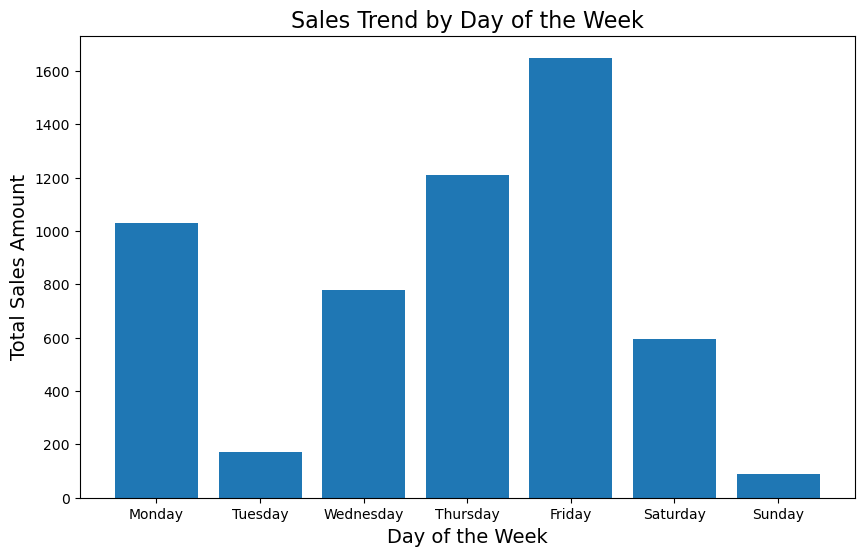

In [231]:
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_day["DayOfWeek"], sales_by_day["Amount"])
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.title("Sales Trend by Day of the Week", fontsize=16)
plt.show()